In [ ]:
Quinn OConnor - Section B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [9]:
df = pd.read_csv('titanic.csv')

df



,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1,111369,Mr,0


In [11]:
total_passengers = len(df)
percentage_male = (df['Sex'].value_counts(normalize=True)[1]) * 100
percentage_survived = (df['Survived'].mean()) * 100

total_passengers, percentage_male, percentage_survived


(891, 64.75869809203144, 38.38383838383838)

1) 891
2) 65%
3) 38%

Your written answer:

 - <Answer 1>
 - <Answer 2>
 - <Answer 3>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [16]:
survival_rates_by_gender = df.groupby('Sex')['Survived'].mean() * 100

percentage_female_survived = survival_rates_by_gender[0]  
percentage_male_survived = survival_rates_by_gender[1]    

percentage_female_survived, percentage_male_survived


(74.20382165605095, 18.890814558058924)

1) 74% of survivors were female
2) 19% of survivors were male

Your written answer:

 - <Answer 1>
 - <Answer 2>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [8]:
import pandas as pd

ticket_class_analysis_clean = (
    df
    .groupby('Pclass')
    .agg(
        Total_Tickets_Percentage=(
            'PassengerId', 
            lambda passengers: (len(passengers) / len(df)) * 100
        ),
        Survivorship_Percentage=(
            'Survived', 
            lambda survived: survived.mean() * 100
        )
    )
    .sort_index()
)

print(ticket_class_analysis_clean)

ticket_class_analysis_clean.to_csv('ticket_class_analysis.csv', index=True)

        Total_Tickets_Percentage  Survivorship_Percentage
Pclass                                                   
1                      24.242424                62.962963
2                      20.650954                47.282609
3                      55.106622                24.236253


Class 1: 24% tickets, 62% survivorship 
Class 2: 21% tickets, 47% survivorship 
Class 3: 55% tickets, 24% survivorship 

Your written answer:

 - Class 1 
    - % tickets:
    - % survivorship: 
- Class 2 
    - % tickets:
    - % survivorship: 
- Class 3
    - % tickets:
    - % survivorship: 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [11]:
import pandas as pd
df = pd.read_csv('titanic.csv')

survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

print("Survivors DataFrame:")
survivors.head()



Survivors DataFrame:


,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [12]:
print("\nNon-Survivors DataFrame:")
non_survivors.head()


Non-Survivors DataFrame:


,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


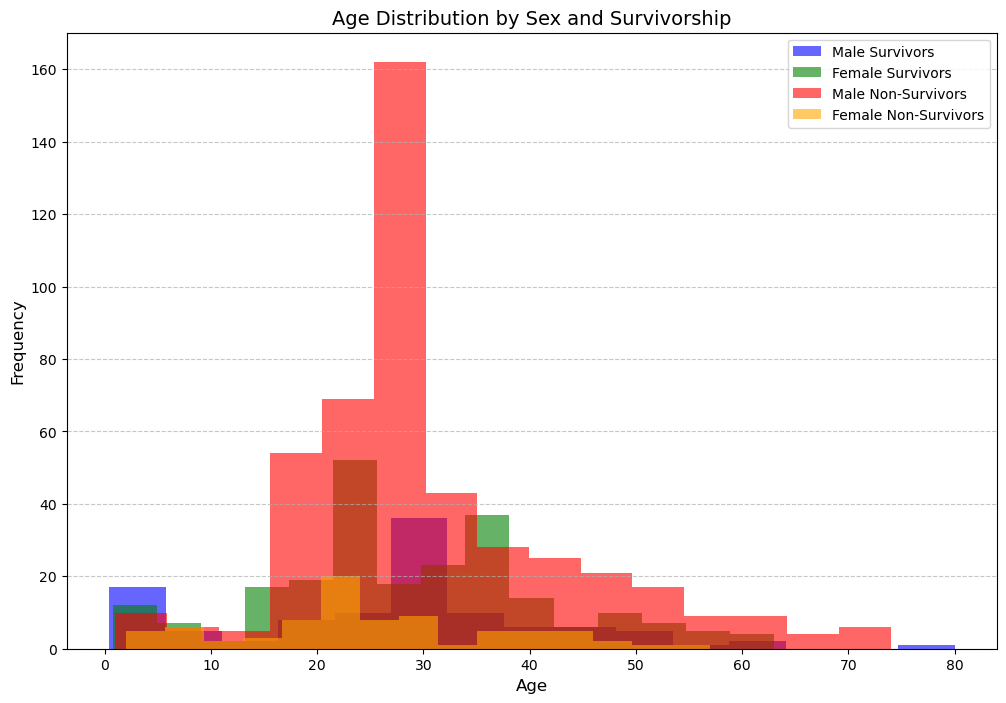

In [9]:
import matplotlib.pyplot as plt

male_survivors = df[(df['Survived'] == 1) & (df['Sex'] == 1)]['Age'].dropna()
female_survivors = df[(df['Survived'] == 1) & (df['Sex'] == 0)]['Age'].dropna()
male_non_survivors = df[(df['Survived'] == 0) & (df['Sex'] == 1)]['Age'].dropna()
female_non_survivors = df[(df['Survived'] == 0) & (df['Sex'] == 0)]['Age'].dropna()

plt.figure(figsize=(12, 8))
plt.hist(male_survivors, bins=15, alpha=0.6, label='Male Survivors', histtype='stepfilled', color='blue')
plt.hist(female_survivors, bins=15, alpha=0.6, label='Female Survivors', histtype='stepfilled', color='green')
plt.hist(male_non_survivors, bins=15, alpha=0.6, label='Male Non-Survivors', histtype='stepfilled', color='red')
plt.hist(female_non_survivors, bins=15, alpha=0.6, label='Female Non-Survivors', histtype='stepfilled', color='orange')

plt.title('Age Distribution by Sex and Survivorship', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
display(drugs_df.info())
display(drugs_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


None

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)
print(titanic_data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

In [22]:
label = ['Survived']
features = ['Sex', 'Age', 'Pclass','Family_Size']
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_data[features], titanic_data[label],test_size=0.2)

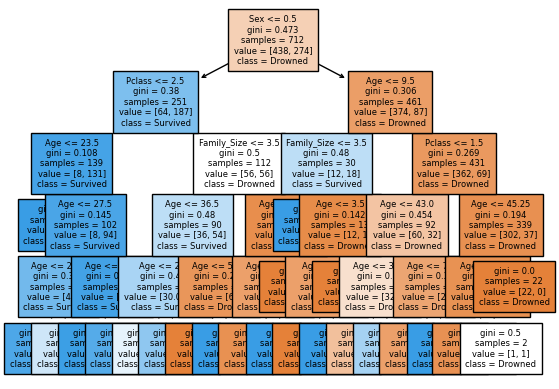

In [23]:
tree_clf = DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(X_train, y_train) 

plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'],
          filled= True, fontsize=6)
plt.show()
#tree_clf.__dict__

<function matplotlib.pyplot.show(close=None, block=None)>

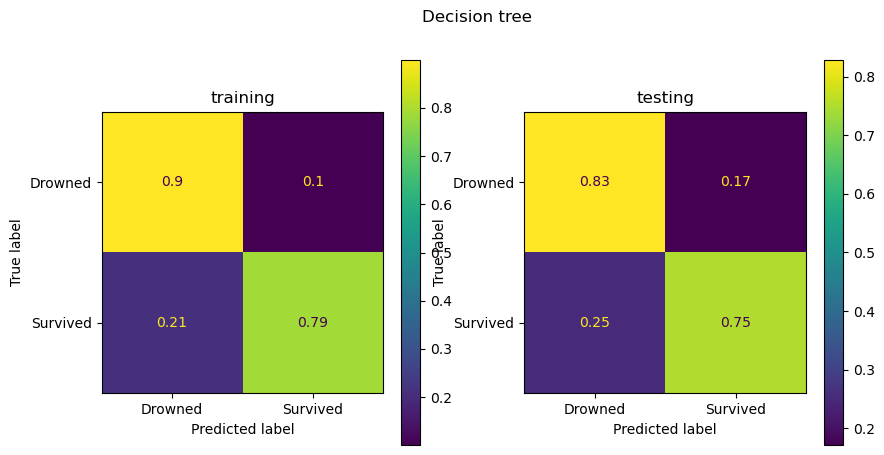

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train,y_tree_train, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[0])

ConfusionMatrixDisplay.from_predictions(y_test,y_tree_test, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision tree')
plt.show


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(Xs_train, ys_train)


KNeighborsClassifier(n_neighbors=15)

<function matplotlib.pyplot.show(close=None, block=None)>

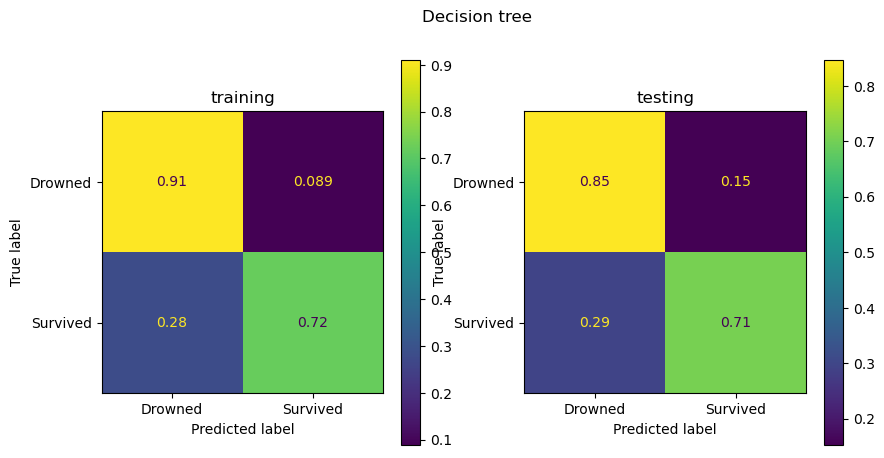

In [28]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

from sklearn.metrics import ConfusionMatrixDisplay
y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train,y_knn_train, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[0])

ConfusionMatrixDisplay.from_predictions(y_test,y_knn_test, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision tree')
plt.show


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

The model's performance on the test data on the training data had better results, as it accurately captured more of the passengers who drowned (more so than the test data). 

Both worked better in their own areas. KNN worked better for drowned passengers, and the decision tree worked better for surviving passengers. Overall, the decision tree was better. 